<a href="https://colab.research.google.com/github/shadab4150/Eye-Disease-Detection/blob/master/SightNet_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

 99% 1.24G/1.26G [00:21<00:00, 35.5MB/s]
100% 1.26G/1.26G [00:21<00:00, 62.5MB/s]


In [0]:
!unzip '/content/drive/My Drive/Dataset/ocular-disease-recognition-odir5k.zip' -d '/content/eye_disease/'

In [0]:
from fastai.vision import *
from fastai import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as immg
import cv2
from tqdm import tqdm, tnrange
from PIL import Image

In [0]:
path = Path('/content/eye_disease/ODIR-5K')

In [0]:
df = pd.read_excel('/content/eye_disease/ODIR-5K/data.xlsx',sheet_name='Sheet1')

In [0]:
df = df.rename(columns ={'N':'Normal','D':'Diabetic','G':'Glaucoma','C':'Cataract','A':'AMD','H':'Hypertension','M':'Myopia','O':'Other_abnormalities'})

In [9]:
for i in df.columns[-8:]:
  print(df[i].value_counts())

0    2360
1    1140
Name: Normal, dtype: int64
0    2372
1    1128
Name: Diabetic, dtype: int64
0    3285
1     215
Name: Glaucoma, dtype: int64
0    3288
1     212
Name: Cataract, dtype: int64
0    3336
1     164
Name: AMD, dtype: int64
0    3397
1     103
Name: Hypertension, dtype: int64
0    3326
1     174
Name: Myopia, dtype: int64
0    2521
1     979
Name: Other_abnormalities, dtype: int64


In [11]:
df.tail(2)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,Normal,Diabetic,Glaucoma,Cataract,AMD,Hypertension,Myopia,Other_abnormalities
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3499,4784,58,Male,4784_left.jpg,4784_right.jpg,hypertensive retinopathy，age-related macular d...,hypertensive retinopathy，age-related macular d...,0,0,0,0,1,1,0,0


In [0]:
right = df['Right-Fundus'].tolist()  # list file_name of right side of eye
left = df['Left-Fundus'].tolist()    # list file_name of left side of eye

In [16]:
path_hr = path/'Training Images';path_hr

PosixPath('/content/eye_disease/ODIR-5K/Training Images')

## A sample of both eyes

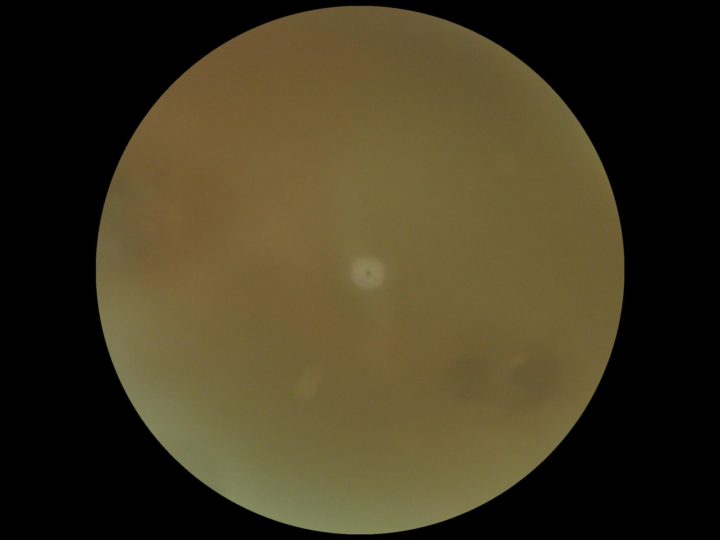

In [32]:
plt.figure(1,figsize=(12,6))
plt.subplot(131)
img11 = immg.imread(path_hr/left[0])
plt.imshow(img11)
plt.title('LEFT EYE')
plt.axis('off')
plt.subplot(132)
img22 = immg.imread(path_hr/right[0])
plt.imshow(img22)
plt.title('RIGHT EYE')
plt.axis('off')
plt.subplot(133)
vis1 = np.concatenate((img11, img22), axis=1)
plt.imshow(vis1)
plt.title('BOTH EYE')
plt.axis('off')
plt.show()


### Array containing file_name of both eyes

In [55]:
eye_both = []            # Array containing file_name of both eyes
for i in tqdm(range(len(right))):
  eye_both.append([left[i],right[i]])

100%|██████████| 3500/3500 [00:00<00:00, 544795.67it/s]


In [0]:
def image_combine(f,index):
  img1 = PIL.Image.open(path_hr/f[0])
  img1 = img1.resize((720,540),resample=PIL.Image.BILINEAR).convert('RGB')
  img2 = PIL.Image.open(path_hr/f[1])
  img2 = img2.resize((720,540),resample=PIL.Image.BILINEAR).convert('RGB')
  img1 = np.asarray(img1)
  img2 = np.asarray(img2)
  vis = np.concatenate((img1, img2), axis=1)
  img3 = Image.fromarray(vis, 'RGB')
  loc = '/content/train/'+str(f[0].split('_')[0])+'.png'
  img3.save(loc)

parallel(image_combine,eye_both,max_workers=5)


### A sample of new combined images

In [0]:
open_image('/content/train/0.png')

In [0]:
import shutil

In [0]:
shutil.make_archive('eye_both','zip','/content/train/')

In [0]:
!cp '/content/eye_both.zip' '/content/drive/My Drive/Dataset/'

In [0]:
def image_process(f,index):   # My custom function to process image to jpg and resize to 512x512
  path_hr = path/'train'
  img = PIL.Image.open(path_hr/f)
  img = img.resize((512,512),resample=PIL.Image.BILINEAR).convert('RGB')
  loc = '/content/small_xray/'+str(f.split('.')[0])+'.jpg'
  img.save(loc,quality = 75)

name_tr = df[df['Dataset_type']=='TRAIN'].X_ray_image_name.tolist()
parallel(image_process,name_tr,max_workers=5)